# Density and speed profiles for King and Plummer models

Figure 8.1 from Chapter 8 of Ryden, *Celestial and Stellar Dynamics*, Cambridge University Press.

Plot density profiles of King models with potential depth W0 = 4, 8, and 12 along with Plummer model with 
$r_c = \left(5/3\right)^{1/2}r_K$ in one panel, and the 1d velocity dispersion $\langle v^2\rangle^{1/2}$ for the
King models shown in panel 

Models were calculated using the online [BHKing calculator](http://www.cosmic-lab.eu/bhking/) on the [Cosmic-Lab website](http://www.cosmic-lab.eu/Cosmic-Lab/Home.html).

In [5]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)
warnings.filterwarnings('ignore',category=RuntimeWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

In [6]:
plotFile = 'Fig8_1.png' 

# graphic aspect ratio = width/height

aspect = 2.2

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

figFmt = 'png'
dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)

# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## King Model data

Pre-computed King Model density and 1d velocity dispersion profiles as a function of dimensionless radius $r/r_K$
computed using the Cosmic-Lab website](http://www.cosmic-lab.eu/Cosmic-Lab/Home.html) [BHKing calculator](http://www.cosmic-lab.eu/bhking/).

Models were computed with 3 values of the potential depth, $W_0$:
 * `KingModel_W4.txt`: $W_0$=4
 * `KingModel_W8.txt`: $W_0$=8
 * `KingModel_W12.txt`: $W_0$=12

Data files are 4-column ASCII format with a header and data columns:
 * `r` radius normalized to $r_{\rm king}$ 
 * `s`: surface density
 * `sigma_p`: 1d (line-of-sight) velocity dispersion
 * `rho`: 3d volume density

In [7]:
modelWList = ['4','8','12']
rhoLabXY = {'4':(5,1e-5),'8':(60,3e-6),'12':(400,1.e-6)}
losLabXY = {'4':(2.5,0.5),'8':(12,0.5),'12':(90,0.5)}

r_rk = {}
rho = {}
losvd = {}

for W in modelWList:
    data = pd.read_csv(f'KingModel_W{W}.txt',sep=r'\s+',comment='#')
    
    r_rk[W] = np.array(data['r'])
    rho[W] = np.array(data['rho'])
    losvd[W] = np.array(data['sigma_p'])
    
# plotting limits

rMin = 0.1
rMax = 1000

rhoMin = 2.0e-8
rhoMax = 2.0

vMin = 0.
vMax = 1.1

### Plummer model

Compute a Plummer model with $r_c = \left(5/3\right)^{1/2}r_K$

In [8]:
sMin = 0.03
sMax = 3000.0

ln_s = np.linspace(np.log(sMin),np.log(sMax),301)

pm_s = np.exp(ln_s)
pm_rho = 1.0/(1.0 + 0.6*pm_s**2)**2.5
pm_sig = 1.0/(1.0 + 0.6*pm_s**2)**2


## Figure 9.1: side by side format

Left panel: density vs r/r$_K$, Right panel: 1d velocity dispersion vs. r/r$_K$.  Log axes on r/r$_K$, log for 
density, linear for the losvd vs r.

King models are plotted as solid lines, the Plummer model as a dashed line.

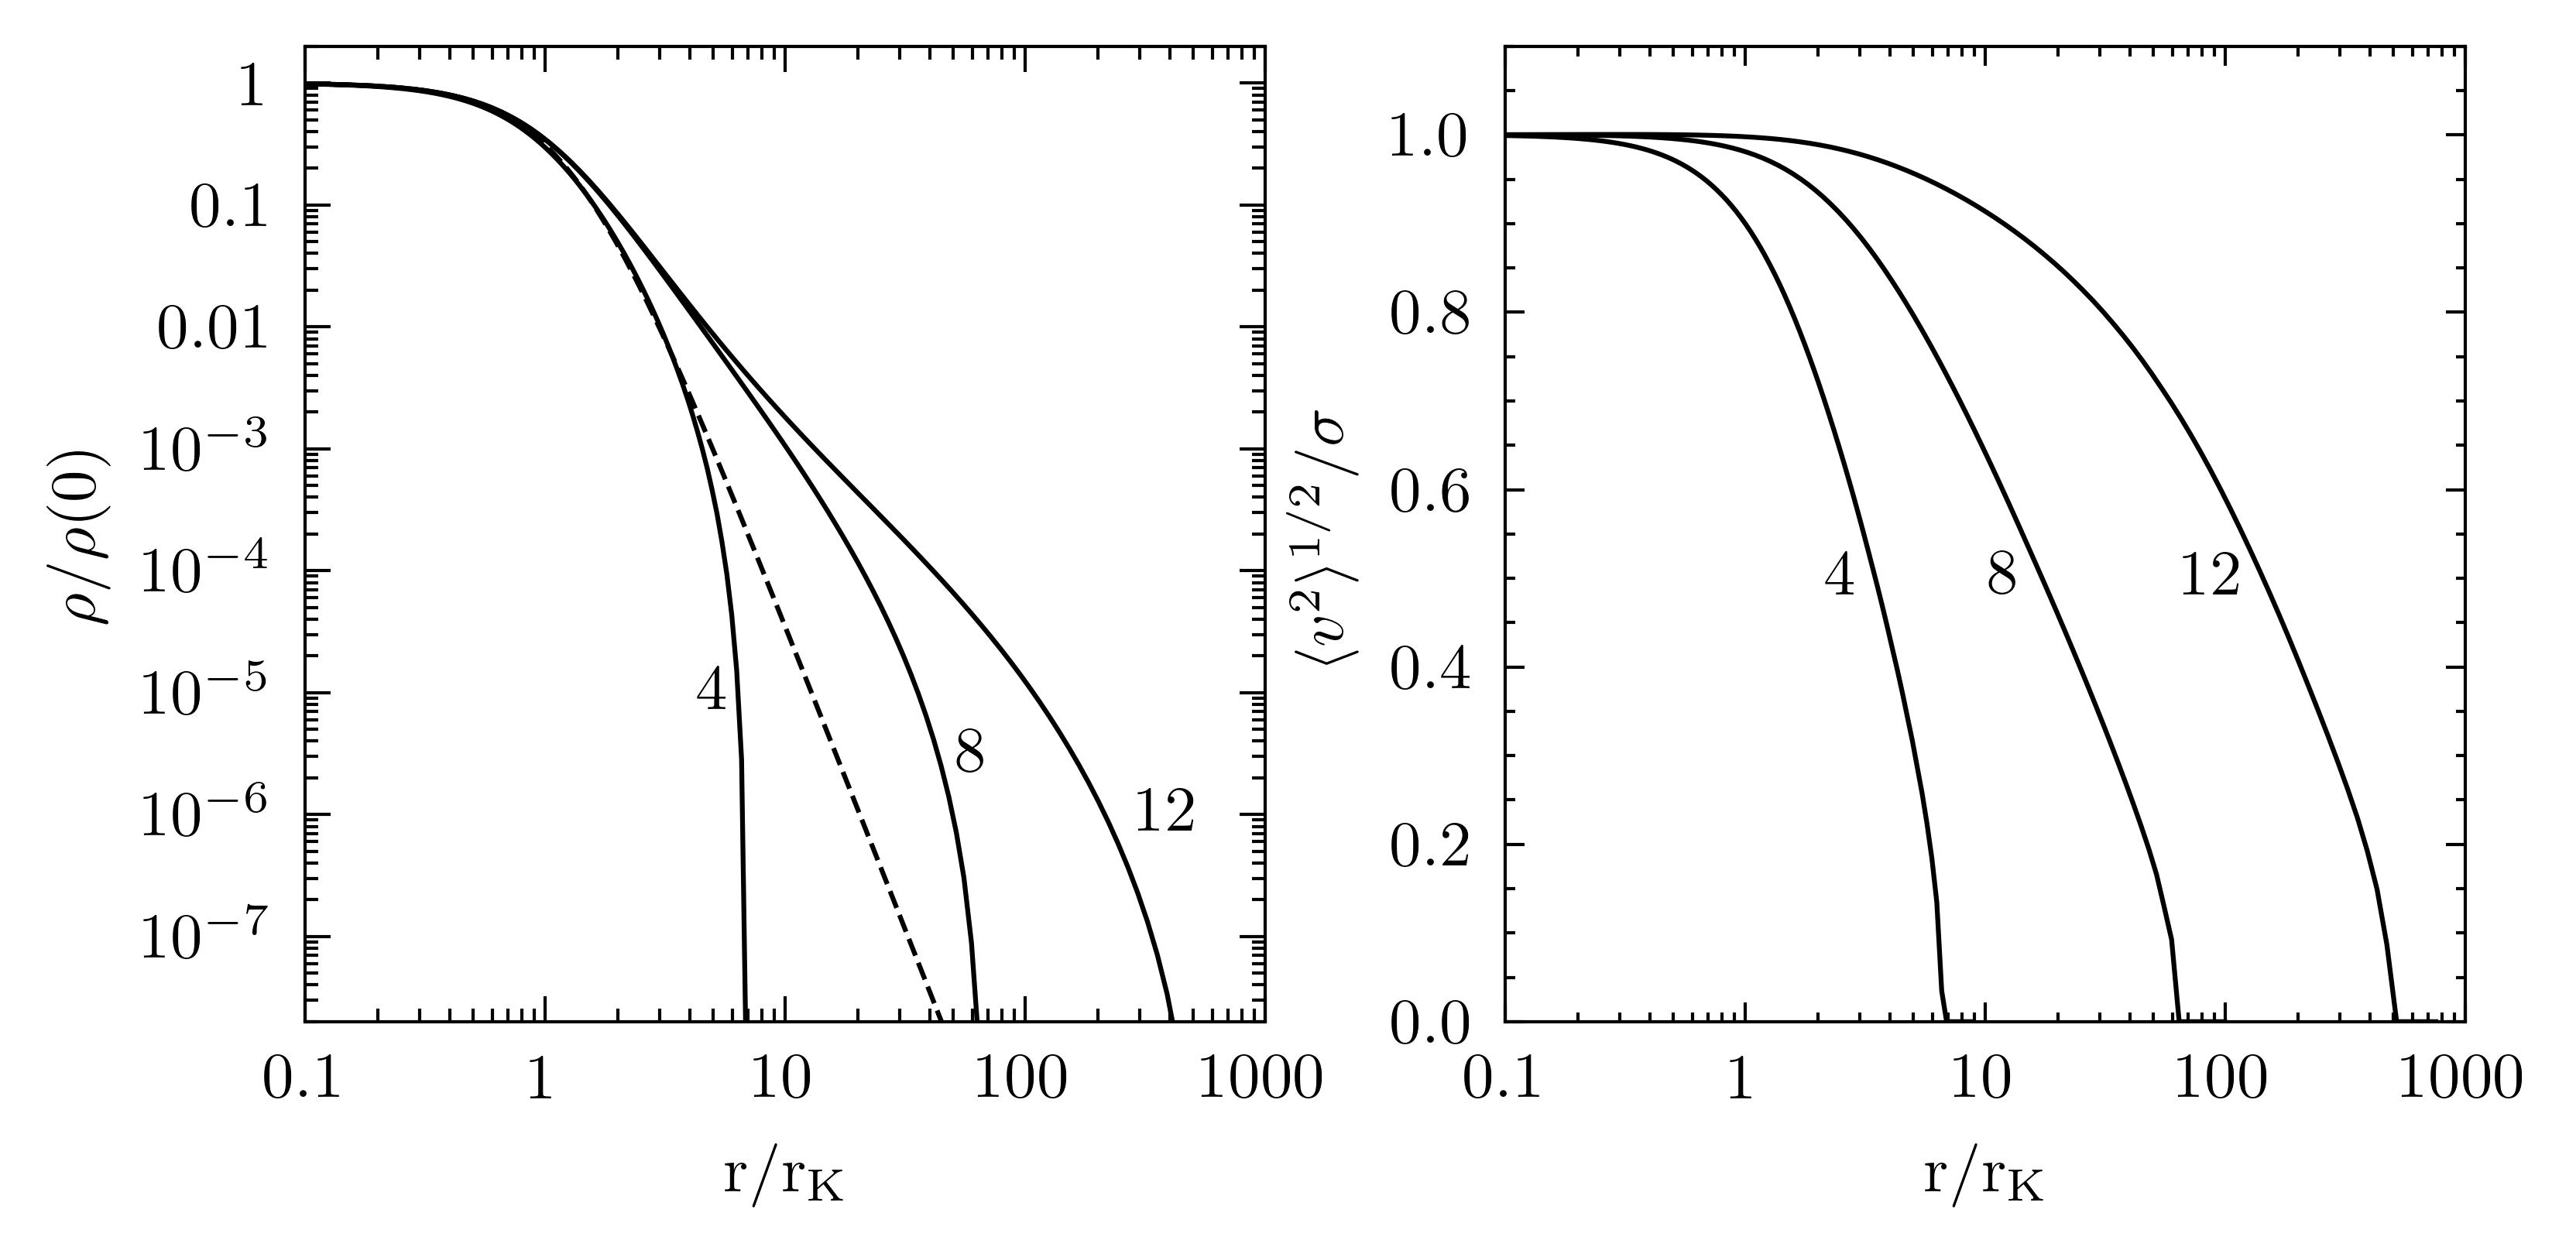

In [9]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(wInches,hInches),dpi=dpi)
fig.subplots_adjust(wspace=0.25, hspace=0.0)

# left panel: density profiles

ax1.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax1.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')

ax1.set_xlim(rMin,rMax)
ax1.set_xscale('log')
ax1.xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax1.xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax1.xaxis.set_minor_formatter(NullFormatter())
ax1.set_xticks([0.1,1,10,100,1000])
ax1.set_xticklabels(['0.1','1','10','100','1000'])
ax1.set_xlabel(r'r/r$_{\rm K}$',fontsize=axisFontSize)

ax1.set_ylim(rhoMin,rhoMax)
ax1.set_yscale('log')
ax1.yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax1.yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax1.yaxis.set_minor_formatter(NullFormatter())
ax1.set_yticks([1.0E-7,1.0e-6,1.0e-5,1.0e-4,1.0e-3,1.0e-2,0.1,1])
ax1.set_yticklabels(['$10^{-7}$','$10^{-6}$','$10^{-5}$','$10^{-4}$','$10^{-3}$',
                     '0.01','0.1','1'])
ax1.set_ylabel(r'$\rho/\rho(0)$',fontsize=axisFontSize)

for W in modelWList:
    ax1.plot(r_rk[W],rho[W],ls='-',lw=0.75,color='black',zorder=10)
    ax1.text(rhoLabXY[W][0],rhoLabXY[W][1],W,ha='center',va='center',fontsize=axisFontSize)

ax1.plot(pm_s,pm_rho,ls='--',lw=0.75,color='black',zorder=9)

# right panel: line-of-sight velocity dispersion

ax2.tick_params('both',length=3,width=lwidth,which='major',direction='in',top='on',right='on')
ax2.tick_params('both',length=1.5,width=lwidth,which='minor',direction='in',top='on',right='on')

ax2.set_xlim(rMin,rMax)
ax2.set_xscale('log')
ax2.xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax2.xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax2.xaxis.set_minor_formatter(NullFormatter())
ax2.set_xticks([0.1,1,10,100,1000])
ax2.set_xticklabels(['0.1','1','10','100','1000'])
ax2.set_xlabel(r'r/r$_{\rm K}$',fontsize=axisFontSize)

ax2.set_ylim(vMin,vMax)
ax2.yaxis.set_major_locator(MultipleLocator(0.2))
ax2.yaxis.set_minor_locator(MultipleLocator(0.05))
ax2.set_ylabel(r'$\langle v^2\rangle^{1/2}/\sigma$',fontsize=axisFontSize)

for W in modelWList:
    ax2.plot(r_rk[W],losvd[W],ls='-',lw=0.75,color='black',zorder=10)
    ax2.text(losLabXY[W][0],losLabXY[W][1],W,ha='center',va='center',fontsize=axisFontSize)
   
plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')